In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [0]:
df=pd.read_csv('train.csv',usecols=['Survived','Pclass','Sex','Age','Fare'])

In [0]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [0]:
df.shape

(891, 5)

In [0]:
df=df.dropna()

In [0]:
df.shape

(714, 5)

In [0]:
# % of those who survived
sum(df.Survived)/len(df)

0.4061624649859944

In [0]:
df['Sex']=list(np.where(df['Sex']=='male',1,0)) #males are replaced by 1 and females by 0

In [0]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [0]:
df['Sex'].unique()

array([1, 0])

In [0]:
import matplotlib.pyplot as plt
from collections import Counter

In [0]:
count=list(df['Sex'])

In [0]:
count=Counter(count)

In [0]:
count

Counter({0: 261, 1: 453})

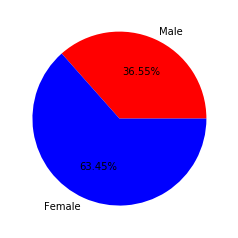

In [0]:
plt.pie([261,453],labels=['Male','Female'],colors=['red','blue'],autopct='%0.2f%%') #showing the percentage of total men and women
plt.show()

In [0]:
X=df[['Pclass','Sex','Age','Fare']]
y=df['Survived']

In [0]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0812 14:27:11.265551 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 14:27:11.315142 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 14:27:11.323217 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
 

W0812 14:27:13.521008 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 14:27:13.566177 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 14:27:13.573412 140113303566208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X, y, epochs=150, batch_size=10)

W0812 14:27:25.536566 140113303566208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
714/714 [==============================] - 1s 1ms/step - loss: 1.1970 - acc: 0.4132
Epoch 2/150
714/714 [==============================] - 0s 131us/step - loss: 0.6778 - acc: 0.6162
Epoch 3/150
714/714 [==============================] - 0s 132us/step - loss: 0.6393 - acc: 0.6625
Epoch 4/150
714/714 [==============================] - 0s 143us/step - loss: 0.6199 - acc: 0.6695
Epoch 5/150
714/714 [==============================] - 0s 152us/step - loss: 0.6080 - acc: 0.6779
Epoch 6/150
714/714 [==============================] - 0s 146us/step - loss: 0.6030 - acc: 0.6779
Epoch 7/150
714/714 [==============================] - 0s 143us/step - loss: 0.5985 - acc: 0.6919
Epoch 8/150
714/714 [==============================] - 0s 142us/step - loss: 0.5987 - acc: 0.6821
Epoch 9/150
714/714 [==============================] - 0s 142us/step - loss: 0.5863 - acc: 0.7003
Epoch 10/150
714/714 [==============================] - 0s 167us/step - loss: 0.5946 - acc: 0.6751
Epoch 11/150
714/714 

In [0]:
accuracy = model.evaluate(X, y)
print(accuracy)

714/714 [==============================] - 0s 89us/step
[0.47532939259745494, 0.791316526777604]


In [0]:
test=pd.read_csv('test.csv')


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test=test[['Pclass','Sex','Age','Fare']]

In [0]:
test['Sex']=list(np.where(test['Sex']=='male',1,0))

In [0]:
test.dropna()

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
5,3,1,14.0,9.2250
6,3,0,30.0,7.6292
7,2,1,26.0,29.0000
8,3,0,18.0,7.2292
9,3,1,21.0,24.1500


In [0]:
predictions=model.predict(test)

In [0]:
for _ in range(len(test)):
 def predict(predictions):
  for i in predictions:
    if i>=0.5:
      print('1')
    else:
      print('0')
 predict(predictions)

0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
1
0
1
0
1
